<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab13a_clustering_image_quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 13 Part A
## Clustering
### Image Quantization

In [1]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [2]:
from matplotlib import image as img

# load the image
# Note that you'll need to upload your image to your Colab storage
# or else use a full URL to an image on the internet.
image_path = 'chick.jpg'
image = img.imread(image_path)

if image is None:
    print('********************************************')
    print('*** Unable to load image', image_path)
    print('********************************************\n')

image.shape

(333, 500, 3)

Image loaded ( 166 x 250 )


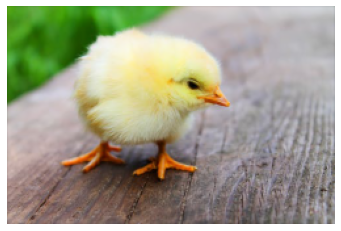

In [3]:
from skimage.transform import resize

# Resize to make things faster
# You can play with what fraction to use for resizing.
image = resize(image, (image.shape[0] // 2, image.shape[1] // 2),
               anti_aliasing=True, mode='constant')

# Normalize pixel values between 0 and 1
image = image / image.max()

# get the height, width, and number of color channels (3)
h, w, ch = image.shape

print('Image loaded (', h, 'x', w, ')')

# show the image
plt.figure()
plt.axis("off")
plt.imshow(image);

In [4]:
# reshape the image to be a list of pixels
# each pixel is a row with 3 columns (R G B)
pixels = image.reshape((h * w, 3))
print('pixels is', pixels.shape)

# First 5 rows
pixels[:5]



pixels is (41500, 3)


array([[0.29242363, 0.55925671, 0.09255526],
       [0.31114221, 0.60060715, 0.09649227],
       [0.30719334, 0.60749099, 0.08565957],
       [0.30128783, 0.60846931, 0.07384854],
       [0.29636064, 0.60552248, 0.08172256]])

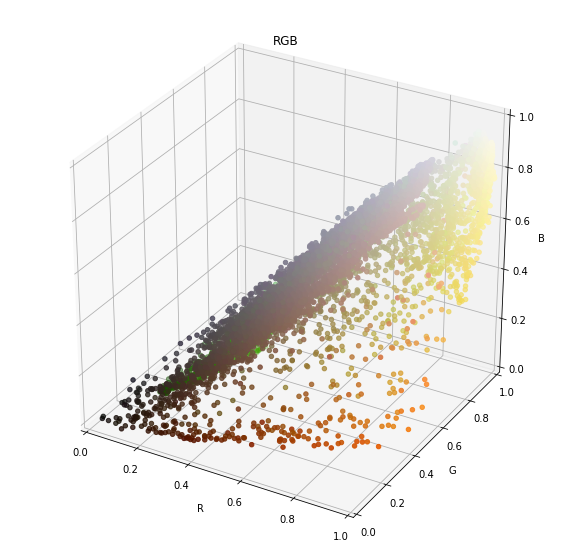

In [5]:
# ---------------------------------------------------------------------
# Show 3D plot of all the pixels in terms of red, green, and blue
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('RGB')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
data = pixels
subsample = 5
data = data[::subsample]
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data)
plt.show()



In [6]:
# cluster the pixel intensities
k = 7
print('Running Kmeans on list of', pixels.shape[0], 'pixels with k =', k, '...')
clt = KMeans(n_clusters=k)
clt.fit(pixels)
print('Kmeans complete')

# Assign each pixel to the closest cluster center
cluster_labels = clt.predict(pixels)


Running Kmeans on list of 41500 pixels with k = 7 ...
Kmeans complete


In [7]:
print('These are the locations of the cluster centers (R G B)')
clt.cluster_centers_

These are the locations of the cluster centers (R G B)


array([[0.92321174, 0.90901641, 0.77964437],
       [0.47419881, 0.39923227, 0.35781725],
       [0.73571649, 0.71124824, 0.714399  ],
       [0.24749397, 0.55449516, 0.11615075],
       [0.2704713 , 0.21205397, 0.11141097],
       [0.85829595, 0.78985944, 0.45990026],
       [0.60085577, 0.56625443, 0.55601292]])

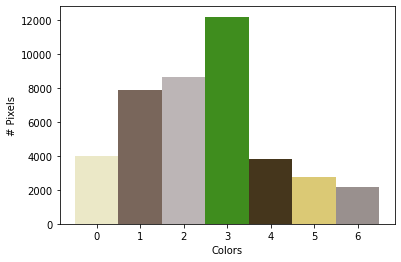

In [8]:
# Get the list of cluster centers
colors = clt.cluster_centers_

# Count how many pixels have been assigned to each cluster label
counts = {}
for label in cluster_labels:
    if not label in counts:
        counts[label] = 1
    else:
        counts[label] += 1

# Show histogram of pixel counts for each cluster
plt.figure()
x = np.arange(k)
plt.bar(x, counts.values(), color=colors, width=1)
plt.xticks(x)
plt.xlabel('Colors')
plt.ylabel('# Pixels')
plt.show()


[[0.24749397 0.55449516 0.11615075]
 [0.24749397 0.55449516 0.11615075]
 [0.24749397 0.55449516 0.11615075]
 [0.24749397 0.55449516 0.11615075]
 [0.24749397 0.55449516 0.11615075]]


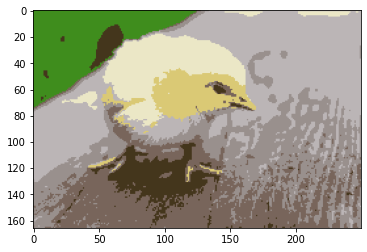

In [9]:
# Assign each pixel to be the color of its closest cluster center
quant = colors[cluster_labels]
print(quant[:5])

# reshape list of RGB values back into an image
img = quant.reshape((h, w, ch))

plt.figure()
plt.imshow(img)
plt.show()